# 01梯度下降法

## 基本概念

是一种基于搜索的最优化方法

作用：最小化一个损失函数

梯度上升法：最大化一个效用函数

并不是所有的目标函数都有唯一的极值点，梯度下降有可能求得的是局部最优解

所以梯度下降法的初始点也是一个超参数

解决方案：多次运行，随机化初始点

$-\eta \frac{d J}{d \theta}$

$\eta$称为学习率

$\eta$的取值影响获得最优解的速度

$\eta$取值不合适，甚至的不到最优解

$\eta$是梯度下降法的一个超参数

## Coding模拟

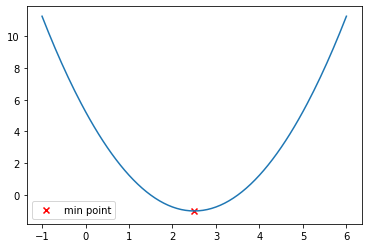

In [5]:
# 数据集准备
import numpy as np
import matplotlib.pyplot as plt
x_plot = np.linspace(-1, 6, 141)
y_plot = (x_plot-2.5)**2 - 1
plt.plot(x_plot, y_plot)
x_min = [2.5,]
y_min = [-1,]
plt.scatter(x_min, y_min, color='r', label='min point', marker='x')
plt.legend()
plt.show()

In [6]:
# 梯度下降求函数J(theta)的最小值点(2.5,-1)

def J(theta):
    return (theta-2.5)**2 - 1

def dJ(theta):
    return 2*(theta-2.5)

# 开始下降，theta以dJ*(eta)的步长减小
theta = 0
eta = 0.1
epsilon = 1e-8

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta- gradient*eta   
    if abs(J(theta)-J(last_theta)) < epsilon:
        break
print('x_min=', theta)    
print('y_min=', J(theta))    
        

x_min= 2.499891109642585
y_min= -0.99999998814289


## 下降过程

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def J(theta):
    return (theta-2.5)**2 - 1

def dJ(theta):
    return 2*(theta-2.5)

# 返回下降过程中所有theta的取值
def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history = [theta,]
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta- gradient*eta
        theta_history.append(theta)
        if abs(J(theta)-J(last_theta)) < epsilon:
            break
    return np.array(theta_history)

# 将下降历史绘制在原图上
def plot_history(theta_history):
    x_plot = np.linspace(-1, 6, 141)
    y_plot = (x_plot-2.5)**2 - 1
    plt.plot(x_plot, y_plot)
    plt.plot(theta_history, J(theta_history), color='r', marker='x')
    plt.show()

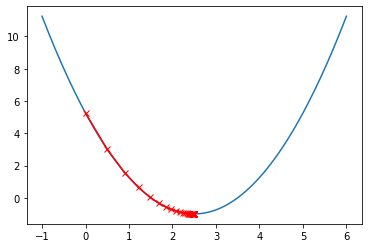

In [23]:
# theta初值为0，步长为0.1
theta_history = gradient_descent(0, 0.1)
plot_history(theta_history)

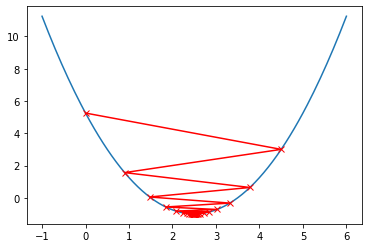

In [24]:
# theta初值为0，步长为0.9
theta_history = gradient_descent(0, 0.9)
plot_history(theta_history)

In [50]:
# theta初值为0，步长为1.1
theta_history = gradient_descent(0, 1.1)
plot_history(theta_history)

OverflowError: (34, 'Result too large')

## 封装改进

对下降过程的模拟存在两个问题：
    
    1.没有指定循环次数，当步长eta过大时，容易造成死循环
    
    2.J(theta)函数健壮性不够,当传入theta无限大时，应该抛出异常

In [78]:
import numpy as np
import matplotlib.pyplot as plt


def J(theta):   
    try:
        return (theta-2.5)**2 - 1
    except:
        return float('inf')

def dJ(theta):
    return 2*(theta-2.5)

# 返回下降过程中所有theta的取值
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history = [theta,]
    i_iter = 1
    while i_iter<=n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta- gradient*eta
        theta_history.append(theta)
        if abs(J(theta)-J(last_theta)) < epsilon:
            break
        i_iter += 1
    return np.array(theta_history)

# 将下降历史绘制在原图上
def plot_history(theta_history):
    x_plot = np.linspace(-1, 6, 141)
    y_plot = (x_plot-2.5)**2 - 1
    plt.plot(x_plot, y_plot)
    plt.plot(theta_history, J(theta_history), color='r', marker='x')
    plt.show()

In [79]:
# theta初值为0，步长为1.01
theta_history = gradient_descent(0, 1.1)
len(theta_history)

10001

In [80]:
# 最后一个theta为无穷大
theta_history[-1]

nan

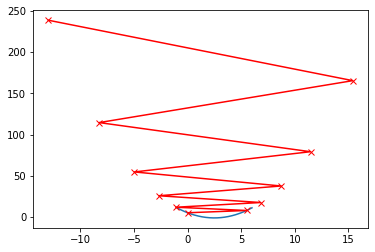

In [81]:
# theta初值为0，步长为1.1, 循环执行次数n_iters=10
theta_history = gradient_descent(0, 1.1,10)
plot_history(theta_history)

# 02 线性回归梯度下降

## 批量梯度下降

模型:

$X^{(i)}=\left(X_{0}^{(i)}, X_{1}^{(i)}, X_{2}^{(i)}, \ldots, X_{n}^{(i)}\right)$,则：

$\hat{y}^{(i)}=\theta_{0} X_{0}^{(i)}+\theta_{1} X_{1}^{(i)}+\theta_{2} X_{2}^{(i)}+\ldots+\theta_{n} X_{n}^{(i)}, X_{0}^{(i)} \equiv 1$

$\hat{y}^{(i)}=X_{b} \cdot \theta$

目标函数：$J(\theta) =\frac 1m \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}=MSE(y,\hat{y})$

$\frac {\nabla J(\theta)}m=\left(\begin{array}{c}{\partial J / \partial \theta_{0}} \\ {\partial J_{\partial \theta_{1}}} \\ {\partial J_{/ \partial \theta_{2}}} \\ {\cdots} \\ {\partial J_{\partial \theta_{n}}}\end{array}\right)$
$=\frac 1m\left(\begin{array}{c}{\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot(-1)} \\ {\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot\left(-X_{i}^{(i)}\right)} \\ {\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot\left(- X_{2}^{(i)}\right)} \\ {\cdots} \\ {\sum_{i=1}^{m} 2\left(y^{(i)}-X_{b}^{(i)} \theta\right) \cdot\left(-X_{n}^{(i)}\right)}\end{array}\right)$
$=2\frac 1m \cdot\left(\begin{array}{c}{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right)} \\ {\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\ {\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\ {\cdots} \\ {\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}}\end{array}\right)$

In [47]:
import numpy as np

def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2)/len(y)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta)-y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta)-y).dot(X_b[:, i])
    return res * 2 / len(X_b)
        

# 返回向量theta
def gradient_descent(theta, X_b, y, eta, n_iters=1e4, epsilon=1e-8):
    i_iter = 1
    while i_iter<=n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta- gradient*eta
        if abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon:
            break
        i_iter += 1
    return theta

In [33]:
# 数据集准备
import numpy as np
m = 100
# 随机数组，一百万个元素
np.random.seed(666)
x = 2 * np.random.random(size=m)
# 增加噪声作为干扰项
noise = np.random.normal(size=m)
X = x.reshape(-1,1)
y = x * 2.0 + 3.0 + noise
X.shape

(100, 1)

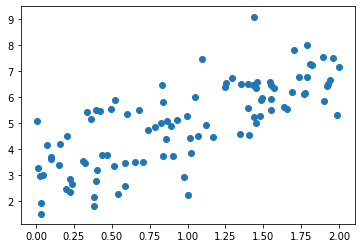

In [34]:
# 数据集预览
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [35]:
# 模型训练
X_b = np.hstack(
    [np.ones(shape=(len(X), 1)), X]
)
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(initial_theta, X_b, y, eta)
theta

array([3.02145499, 2.0070652 ])

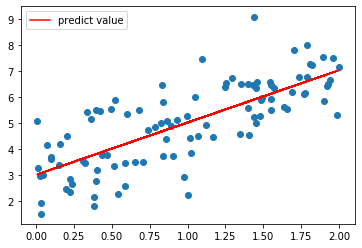

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
y_predict = theta[0] + theta[1] * x
plt.plot(x, y_predict, color='r', label='predict value')
plt.legend()
plt.show()

In [3]:
from handjob.LinerRegression import LinerRegression
import numpy as np

m = 100
# 随机数组，一百万个元素
np.random.seed(666)
x = 2 * np.random.random(size=m)
# 增加噪声作为干扰项
noise = np.random.normal(size=m)
X = x.reshape(-1,1)
y = x * 2.0 + 3.0 + noise


eta = 0.01
lr = LinerRegression()
lr.fit_GD(X, y, eta)
print(lr.intercept_)
print(lr.coefficient_)

3.0214549867267007
[2.0070652]


## 随机梯度下降

In [49]:
import numpy as np

def dJ_sgd(theta, X_b, y):
    k = np.random.randint(1, len(X_b))
    X_k = X_b[k]
    y_k = y[k]
    res = (X_k.T).dot(X_k.dot(theta)-y_k)
    return res*2
        

# 返回向量theta
def stochastic_GD(initial_theta, X_b, y, n_iters):
    
    theta = initial_theta
    i_iter = 1
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0/(t+t1)
    
    while i_iter<=n_iters:
        gradient = dJ_sgd(theta, X_b, y)
        theta = theta- gradient*learning_rate(i_iter)
        i_iter += 1
    return theta

In [44]:
# 数据集准备
import numpy as np
m = 20000
# 随机数组，一百万个元素
np.random.seed(666)
x = 2 * np.random.random(size=m)
# 增加噪声作为干扰项
noise = np.random.normal(size=m)
X = x.reshape(-1,1)
y = x * 2.0 + 3.0 + noise

# 模型训练
X_b = np.hstack(
    [np.ones(shape=(len(X), 1)), X]
)
initial_theta = np.zeros(X_b.shape[1])

In [50]:
%%time
theta = stochastic_GD(initial_theta, X_b, y, 1e4)
theta

Wall time: 60.9 ms


array([2.97203353, 1.97943412])

In [48]:
%%time
eta = 0.01
theta = gradient_descent(initial_theta, X_b, y, eta)
theta

Wall time: 392 ms


array([3.000764 , 1.9999845])

明显看出，当样本数量m足够大时，同样循环次数的情况下，随机梯度速度更快

In [22]:
# 加载数据集
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y<50]
y = y[y<50]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.2 )

# 使用梯度下降法必须对数据集进行归一化
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = standardScaler.transform(X_train)
X_test_std = standardScaler.transform(X_test)

In [23]:
from handjob.LinerRegression import LinerRegression
lr = LinerRegression()
%time lr.fit_sgd(X_train_std,y_train,n_iters=50)
lr.score(X_test_std, y_test)

Wall time: 97.8 ms


0.8123899293294453

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=100)
%time sgd_reg.fit(X_train_std,y_train)
sgd_reg.score(X_test_std, y_test)

Wall time: 14 ms


0.8127376128039222

# 03 关于梯度的调式

dJ_math：多元线性回归梯度下降的dJ(theta)比较容易用数学公式推导
dJ_debug：但当模型较为复杂，对其目标函数J(theta),求出的dJ(theta)不确定是否正确时，可以使用导数定义的方法求dJ(theta)的近似值
再用自己推导出的不确定的公式dJ_math求一遍，两者对比，可检验数学公式法是否正确

dJ_debug可复用与任何模型的目标函数，且结果一定是较为精确的，epsilon越小越精确,但运算时间太慢

$\frac { \nabla J(\theta_{i}+\epsilon) - \nabla J(\theta_{i}-\epsilon)}{2\epsilon} $

In [10]:
# 目标函数
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2)/len(y)
    except:
        return float('inf')

def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta)-y)*2 / len(y)

def dJ_debug(theta,X_b,y,epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        # 求theta_i_left和heta_i_right
        theta_right = theta.copy()
        theta_right[i] += epsilon
        theta_left = theta.copy()
        theta_left[i] -= epsilon
        # 对每一个theta_i 按公式求出其近似导数值，并最终存入res数据集
        res[i] = (J(theta_right, X_b, y) - J(theta_left, X_b, y))/(2*epsilon)
    return res

# 指定dJ的求解方法，计算theta
def gradient_descent(dJ, initial_theta, X_b, y, eta, n_iters=1e4, epsilon=1e-8):
    i_iter = 1
    theta = initial_theta
    while i_iter<=n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta- gradient*eta
        if abs(J(theta, X_b, y)-J(last_theta, X_b, y)) < epsilon:
            break
        i_iter += 1
    return theta

In [11]:
# 模拟数据集
# 1000个样本 10个特征
import numpy as np
np.random.seed(666)
X = np.random.random(size=(1000,10))
# 随机生成theta0 - theta10
true_theta = np.arange(1, 12, dtype=float)
X_b = np.hstack(
    [np.ones(shape=(len(X), 1)), X]
)
# 增加噪声作为干扰项
noise = np.random.normal(size=len(X))
y = X_b.dot(true_theta) + noise

In [12]:
# 模型训练
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
# 先试用dJ_debug计算近似theta值
%time theta = gradient_descent(dJ_debug, initial_theta, X_b, y, eta)
theta

Wall time: 2.79 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [13]:
# 再用推出的公式dJ_math计算近似theta值，与dJ_debug结果比较，验证是否推导正确
%time gradient_descent(dJ_math, initial_theta, X_b, y, eta)

Wall time: 417 ms


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

# 04 总结

## 批量梯度下降法

一次看所有样本，求梯度。此梯度较为稳定，一定是沿着最快下降方向的梯度

但运算量大，样本数足够多时，运算时间很长

## 随机梯度下降法

一次只求一个样本作为梯度，具有随机性，可能沿反方向下降，有可能得不到最优解

但有可能跳出局部最优解，方向随机有可能出坑。且运算量最小，效率较高

## 小批量梯度下降法

综合批量和随机的优缺点，一次看k个样本，求梯度

其中k为超参数,即，小批量到底是多小的批量